# **1. Dataset Heart Disease**

Pada dataset heart disease, kita akan melakukan determinasi machine learning model yang sesuai dengan mengidentifikasi problem pada dataset yang digunakan.

In [ ]:
# import library yang dibutuhkan
import pandas as pd

# Proses ekstrak data
df_heart = pd.read_csv('heart.csv')

# Tampilkan hasilnya
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **2. Informasi Umum pada Data**

In [ ]:
# Akses informasi umum pada data
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Detail Kolom**

* **age**: Representasi usia pasien dalam tahun. Variabel ini merupakan numerik.
* **sex**: Jenis kelamin pasien. 0: Perempuan; 1: Laki-laki
* **cp**: Jenis nyeri dada yang dirasakan oleh pasien.
0: Nyeri dada tipikal;
1: Nyeri dada yang tidak tipikal;
2: Nyeri dada yang tidak berhubungan dengan angina;
3: Tidak ada nyeri dada;
* **trestbps**: Tekanan darah istirahat pasien (mmHg).
* **chol**: Kadar serum kolestrol pasien (mg/dl).
* **fbs**: Kadar gula darah puasa pasien.
0: Kadar gula darah puasa <=120 mg/dl;
1: Kadar gula darah puasa >120 mg/dl
* **restecg**: Hasil elektrokardiografi istirahat.
0: Hasil normal;
1: Terdapat kelainan gelombang ST-T (invert atau hipertrofi ventrikel);
2: Menunjukkan kemungkinan hipertrofi ventrikel kiri menurut kriteria Estes;
* **thalach**: Detak jantung maksimum yang tercapai oleh pasien.
* **exang**: Keberadaan angina yang diinduksi oleh latihan.
0: Tidak ada angina yang diinduksi oleh latihan;
1: Ada angina yang diinduksi oleh latihan;
* **oldpeak**: Depresi segmen ST yang dihasilkan oleh latihan relatif terhadap istirahat.
* **slope**: Kemiringan segmen ST saat latihan.
0: Kemiringan tidak relevan;
1: Kemiringan naik;
2: Kemiringan turun;
* **ca**: Jumlah pembuluh darah utama yang berwarna dengan pewarnaan flourosopi. Nilainya 0-3.
* **thal**: Jenis thalassemia.
0: Normal;
1: Kekurangan darah;
2: Kehadiran reversibilitas;
* **target**: Label kelas yang menunjukkan apakah pasien terkena penyakit jantung atau tidak.
0: Tidak terkena penyakit jantung;
1: Terkena penyakit jantung;

# **3. Identifikasi Problem Utama**

In [ ]:
# Buat list fitur kategorik
df_heart_category = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Lihat nilai unik tiap fitur kategorik
for cat_column in df_heart_category:
    print(f'\nNama kolom = {cat_column}')
    print(df_heart[cat_column].unique())


Nama kolom = sex
[1 0]

Nama kolom = cp
[0 1 2 3]

Nama kolom = fbs
[0 1]

Nama kolom = restecg
[1 0 2]

Nama kolom = exang
[0 1]

Nama kolom = slope
[2 0 1]

Nama kolom = thal
[3 2 1 0]


Value 3 pada fitur thal tidak sesuai deskripsi dataset (tidak valid).

In [ ]:
# Perhitungan proporsi target
proporsi_target = df_heart\
    .groupby('target', as_index = False)\
    .agg(total = ('target', 'count'))

# Tampilkan hasil
display(proporsi_target)

,target,total
0,0,499
1,1,526


Proporsi target 0 dan 1 tidak seimbang.

In [ ]:
# Import library untuk visualisasi
import plotly.express as px

# Hitung total data
total_data = proporsi_target['total'].sum()

# Warna
hijau_pucat = '#E1F0DA'
merah = '#FF4B5C'

# Buat pie chart
fig = px.pie(
    values = proporsi_target['total'],
    names = ['Tidak terkena penyakit jantung', 'Terkena penyakit jantung'],
    color_discrete_sequence = [merah, hijau_pucat],
    hole = 0.63
)

# Atur posisi label
fig.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label',
    hovertemplate='<b>%{label}</b><br>%{value} Pasien'
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = f"<b>Proporsi Hasil Diagnosa Pasien</b><br>",
        font = dict(
            size = 25,
            color = '#757882'
        ),
        y = 0.92,
        x = 0.5
    )
)

# Berikan informasi total pelanggan di tengah donut chart
fig.add_annotation(
    text = f'Total Pasien<br><b><span style="font-size: 28px;">{total_data}</b></span>',
    x = 0.5,
    y = 0.5,
    showarrow = False,
    font = dict(size = 30)
)

# Tampilkan grafik
fig.show()

# **4. Exploratory Data Analysis (EDA)**

## **4.1 Statistik Deskriptif**

In [ ]:
# Seleksi kolom numerik
num_df = df_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

# Perhitungan statistik deskriptif
statistics = pd.DataFrame({
    'mean' : num_df.mean().round(2),
    'median': num_df.median(),
    'modus': num_df.mode().iloc[0],
    'min': num_df.min(),
    'max': num_df.max(),
    'q1' : num_df.quantile(0.25),
    'q2' : num_df.quantile(0.50),
    'q3' : num_df.quantile(0.75),
    'stdev' : num_df.std().round(2)
})

# Tampilkan hasilnya
display(statistics)

,mean,median,modus,min,max,q1,q2,q3,stdev
age,54.43,56.0,58.0,29.0,77.0,48.0,56.0,61.0,9.07
trestbps,131.61,130.0,120.0,94.0,200.0,120.0,130.0,140.0,17.52
chol,246.00,240.0,204.0,126.0,564.0,211.0,240.0,275.0,51.59
thalach,149.11,152.0,162.0,71.0,202.0,132.0,152.0,166.0,23.01
oldpeak,1.07,0.8,0.0,0.0,6.2,0.0,0.8,1.8,1.18
ca,0.75,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.03


Diperoleh data yang tidak valid yakni kolom *ca* yang bernilai 4 (tidak sesuai dengan deskripsi data di mana kolom *ca* nilainya 0 hingga 3 saja) sehingga perlu dicari tahu terlebih dahulu berapa banyak data yang tidak valid. Jika jumlahnya cukup sedikit, maka bisa dilakukan penghapusan data yang memiliki nilai *ca* = 4.

## **4.2 Data Validation**

Terdapat dua fitur dengan data yang tidak valid, yaitu fitur *ca* dengan value *ca* = 4 dan fitur *thal* dengan value *thal* = 3. Keduanya tidak valid karena tidak sesuai deskripsi kolom pada dataset.

In [ ]:
# Cek jumlah data pada kolom 'ca' yang bernilai 4
df_heart[df_heart['ca'] == 4].shape

(18, 14)

Data yang tidak valid pada kolom *ca* jumlahnya sedikit, yaitu 18 data sehingga data tersebut akan dihapus.

In [ ]:
# Menghapus baris dengan nilai 'ca' sama dengan 4
df_heart.drop(df_heart[df_heart['ca'] == 4].index, inplace=True)

In [ ]:
# Cek value unik fitur ca
df_heart['ca'].unique()

array([2, 0, 1, 3])

In [ ]:
# Cek jumlah data masing-masing nilai kategori fitur 'thal'
df_heart['thal'].value_counts()

thal
2    533
3    403
1     64
0      7
Name: count, dtype: int64

Nilai kategori pada 'thal' seharusnya dari 0 hingga 2, tetapi pada data justru sampai 3. Berhubung jumlah data dengan nilai kategori 3 cukup banyak, maka penghapusan data dirasa kurang tepat. Diasumsikan bahwa terdapat kesalahan input di mana pada kategori *Normal* yang seharusnya dilabeli dengan 0 justru dilabeli dengan 1. Hal tersebut bisa terjadi karena miskomunikasi/miskonsepsi terkait label yang diberikan pada kategori *Normal* yang memang biasanya dilabeli antara 0 atau 1. Oleh karena itu, perlu dilakukan penggabungan kategori dan penyetelan ulang kategori dengan rincian berikut.

* Kategori 0 dan 1 menjadi kategori 0
* Kategori 2 menjadi kategori 1
* Kategori 3 menjadi kategori 2

In [ ]:
# Menggabungkan nilai kategori 0 dan 1 menjadi 0
df_heart['thal'] = df_heart['thal'].replace({1: 0})

# Mengganti nilai 2 menjadi 1 dan nilai 3 menjadi 2
df_heart['thal'] = df_heart['thal'].replace({2: 1, 3: 2})

# Menampilkan hasil setelah penggabungan
df_heart['thal'].value_counts()

thal
1    533
2    403
0     71
Name: count, dtype: int64

Setelah data tidak valid diubah, periksa kembali statistik deskriptifnya (fitur numerik saja).

In [ ]:
# Seleksi kolom numerik
num_df = df_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

# Perhitungan statistik deskriptif
statistics_baru = pd.DataFrame({
    'mean' : num_df.mean().round(2),
    'median': num_df.median(),
    'modus': num_df.mode().iloc[0],
    'min': num_df.min(),
    'max': num_df.max(),
    'q1' : num_df.quantile(0.25),
    'q2' : num_df.quantile(0.50),
    'q3' : num_df.quantile(0.75),
    'stdev' : num_df.std().round(2)
})

# Tampilkan hasilnya
display(statistics_baru)

,mean,median,modus,min,max,q1,q2,q3,stdev
age,54.59,56.0,58.0,29.0,77.0,48.0,56.0,61.0,9.01
trestbps,131.57,130.0,120.0,94.0,200.0,120.0,130.0,140.0,17.66
chol,246.73,240.0,204.0,126.0,564.0,211.0,240.0,276.0,51.62
thalach,148.90,152.0,162.0,71.0,202.0,132.0,152.0,165.0,23.08
oldpeak,1.09,0.8,0.0,0.0,6.2,0.0,0.8,1.8,1.18
ca,0.70,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.94


## **4.3 Periksa Missing Value**

In [ ]:
# Periksa missing value
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## **4.4 Periksa Data Duplikat**

In [ ]:
# Periksa duplikat data
df_heart.duplicated().sum()

709

Terlalu banyak duplikasi data yang mungkin terjadi karena dataset Heart Disease tidak memiliki foreign key berupa id pasien sehingga sangat mungkin terdapat duplikasi. Oleh karena itu, data duplikat bisa kita abaikan untuk mempertahankan jumlah dataset.

## **4.5 Periksa Distribusi Data & Outlier**

In [ ]:
# Import library visualisasi data
import plotly.express as px

# Ambil kolom numerik saja pada data
num_df = df_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

# Definisikan warna
colors = ["#800000", "#006994", "#228B22", "#F875AA", "#BA55D3", "#FFA500"]

for col, colour in zip(num_df.columns, colors):
    # Buat horizontal box plot
    fig = px.histogram(
        df_heart[col],
        color_discrete_sequence  = [colour],
        marginal = 'box',
        nbins = 50
    )

    fig.update_traces(
        marker_line_width = 1,
        marker_line_color = 'white'
    )

    # Update layout
    fig.update_layout(
        width = 1200,
        height = 350,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = f"<b>Box Plot <span style='color:{colour}'>{col}</span></b>",
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        xaxis = dict(
            title = col,
            showgrid = False,
            showline = True,
            showticklabels = True,
            zeroline = False,
        )
    )

    # Tampilkan grafik
    fig.show()

In [ ]:
# Memeriksa jumlah outlier tiap kolom
# Mendefinisikan fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Mendeteksi outlier untuk setiap kolom numerik
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
outliers_dict = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_heart[col])
    outliers_count = outliers.sum()
    outliers_dict[col] = outliers_count

# Menampilkan jumlah outlier untuk setiap kolom numerik
print("Jumlah outlier untuk setiap kolom numerik:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")

Jumlah outlier untuk setiap kolom numerik:
age: 0
trestbps: 30
chol: 16
thalach: 4
oldpeak: 7
ca: 69


Berdasarkan boxplot, semua kolom numerik kecuali kolom umur memiliki outliers. Melihat jumlah outliers pada beberapa kolom, bisa dikatakan bahwa cukup banyak outliers pada dataset. Apabila didrop, maka akan kehilangan data yang cukup banyak yang dapat mempengaruhi proses modelling sehingga untuk mempertahankan data, outliers dapat diabaikan.

## **4.6 Statistik Deskriptif Berdasarkan Tipe Target**

In [ ]:
# Bagi data kedalam kelompok
df_target_disease = df_heart[df_heart['target'] == 1]
df_target_no_disease = df_heart[df_heart['target'] == 0]

In [ ]:
# Seleksi kolom numerik
col_number = num_df.columns

# Ambil hanya data numerik per masing - masing outcome
df_num_target_disease = df_target_disease[col_number]
df_num_target_no_disease = df_target_no_disease[col_number]

# Perhitungan statistik deskriptif per masing - masing outcome
statistics_breakdown_target = pd.DataFrame({
    ('Mean', 'Heart Disease') : df_num_target_disease.mean().round(2),
    ('Mean', 'No Heart Disease') : df_num_target_no_disease.mean().round(2),
    ('Median', 'Heart Disease') : df_num_target_disease.median().round(2),
    ('Median', 'No Heart Disease') : df_num_target_no_disease.median().round(2),
    ('Modus', 'Heart Disease') : df_num_target_disease.mode().iloc[0],
    ('Modus', 'No Heart Disease') : df_num_target_no_disease.mode().iloc[0],
    ('Min', 'Heart Disease') : df_num_target_disease.min(),
    ('Min', 'No Heart Disease') : df_num_target_no_disease.min(),
    ('Max', 'Heart Disease') : df_num_target_disease.max(),
    ('Max', 'No Heart Disease') : df_num_target_no_disease.max(),
    ('Q1', 'Heart Disease') : df_num_target_disease.quantile(0.25),
    ('Q1', 'No Heart Disease') : df_num_target_no_disease.quantile(0.25),
    ('Q2', 'Heart Disease') : df_num_target_disease.quantile(0.50),
    ('Q2', 'No Heart Disease') : df_num_target_no_disease.quantile(0.50),
    ('Q3', 'Heart Disease') : df_num_target_disease.quantile(0.75),
    ('Q3', 'No Heart Disease') : df_num_target_no_disease.quantile(0.75),
    ('St. Dev', 'Heart Disease') : df_num_target_disease.std().round(2),
    ('St. Dev', 'No Heart Disease') : df_num_target_no_disease.std().round(2)
})

# Buat dataframe
df_stat_breakdown_target = pd.DataFrame(statistics_breakdown_target)

# Tampilkan hasilnya
display(df_stat_breakdown_target)

Mean                         Median                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age              52.59            56.65          52.0             58.0   
trestbps        129.09           134.12         130.0            130.0   
chol            242.28           251.32         234.0            249.0   
thalach         158.41           139.11         161.0            142.0   
oldpeak           0.58             1.61           0.2              1.4   
ca                0.26             1.14           0.0              1.0   

                 Modus                            Min                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age               54.0             58.0          29.0             35.0   
trestbps         130.0            140.0          94.0            100.0   
chol             240.0            212.0         126.0            131.0   
thalach          162.0            132.0          96.0             71.0   
oldpeak            0.0              0.0           0.0              0.0   
ca                 0.0              0.0           0.0              0.0   

                   Max                             Q1                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age               76.0             77.0          44.0             52.0   
trestbps         180.0            200.0         120.0            120.0   
chol             564.0            409.0         208.0            217.0   
thalach          202.0            195.0         149.0            125.0   
oldpeak            4.2              6.2           0.0              0.6   
ca                 3.0              3.0           0.0              0.0   

                    Q2                             Q3                   \
         Heart Disease No Heart Disease Heart Disease No Heart Disease   
age               52.0             58.0         59.00           62.000   
trestbps         130.0            130.0        140.00          144.000   
chol             234.0            249.0        267.00          284.000   
thalach          161.0            142.0        172.00          156.250   
oldpeak            0.2              1.4          1.05            2.525   
ca                 0.0              1.0          0.00            2.000   

               St. Dev                   
         Heart Disease No Heart Disease  
age               9.59             7.86  
trestbps         16.29            18.63  
chol             53.08            49.71  
thalach          19.23            22.63  
oldpeak           0.78             1.29  
ca                0.62             1.01

Mayoritas pasien yang terdiagnosa terkena penyakit jantung memiliki kadar kolesterol sebesar 240 mg/dl.

## **4.7 Distribusi Berdasarkan Tipe Target**

In [ ]:
# Import library yang dibutuhkan
import plotly.figure_factory as ff

# Seleksi kolom numerik
number_df_col = num_df.columns

for col in number_df_col:

    # Group data together
    hist_data = [df_target_disease[col], df_target_no_disease[col]]
    group_labels = ['Heart Disease', 'No Heart Disease']

    # Create distplot with custom bin_size
    fig = ff.create_distplot(
        hist_data,
        group_labels,
        show_hist = False,
        show_rug = False
    )

    fig.update_layout(
        width = 1200,
        height = 450,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>Distribusi <span style='color:#B33030'>{col}</span> pada Data Heart Disease VS Non Heart Disease</b>",
            font = dict(
                size = 25,
                color = 'black'
            ),
            y = 0.92,
            x = 0.5
        )
    )


    fig.update_xaxes(showline = True, linewidth = 1, linecolor = 'black')
    fig.update_yaxes(showline = True, linewidth = 1, linecolor = 'black')

    # Tampilkan visualisasi
    fig.show()

## **4.8 Proporsi Target Berdasarkan Sex/Gender**

In [ ]:
# Perhitungan proporsi target
df_heart['sex'].value_counts()

sex
1    695
0    312
Name: count, dtype: int64

Jumlah pasien laki-laki lebih banyak daripada perempuan dengan pasien laki-laki berjumlah 695 pasien sedangkan pasien perempuan sebanyak 312 pasien.

In [ ]:
# Perhitungan proporsi target
proporsi_target_per_gender = df_heart\
    .groupby(['target', 'sex'], as_index = False)\
    .agg(total = ('target', 'count'))

# Tampilkan hasil
display(proporsi_target_per_gender)

,target,sex,total
0,0,0,86
1,0,1,410
2,1,0,226
3,1,1,285


Terdapat 86 pasien perempuan dan 410 pasien laki-laki yang didiagnosis tidak terkena penyakit jantung. Sementara itu, sebanyak 226 pasien perempuan dan 285 pasien laki-laki didiagnosis terkena penyakit jantung.

<h3><b>Lakukan Uji Non-Parametrik</b></h3>

Uji chi-square (chi-square test) adalah metode statistik yang digunakan untuk menguji hubungan atau ketergantungan antara dua variabel kategorikal. Uji chi-square dapat membantu menjawab pertanyaan apakah ada hubungan signifikan antara dua variabel atau apakah perbedaan dalam distribusi variabel tersebut hanya terjadi secara kebetulan.

Hipotesis :     
* **Hipotesis Nol (H0)**: Tidak ada hubungan antara kolom sex dan target pada populasi yang diwakili oleh data heart disease. Dengan kata lain, proporsi target (misalnya berpotensi terkena penyakit jantung atau tidak) tidak berbeda secara signifikan antara kelompok gender (misalnya laki-laki dan perempuan).

* **Hipotesis Alternatif (H1)**: Terdapat hubungan antara kolom sex dan target pada populasi yang diwakili oleh data heart disease. Dengan kata lain, terdapat perbedaan yang signifikan dalam proporsi target antara kelompok gender.

In [ ]:
# Import library uji chi-square
from scipy.stats import chi2_contingency

# Membentuk tabel kontingensi dari data proporsi
contingency_table = proporsi_target_per_gender.pivot(
    index = 'target',
    columns = 'sex',
    values = 'total'
).values

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil uji chi-square
print("Hasil uji chi-square:")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Hasil uji chi-square:
Chi-square statistic: 83.84519091324023
p-value: 5.350759679966452e-20


Pada uji non-parametrik di atas, diperoleh nilai chi-square yang tinggi dan p-value yang sangat kecil. Semakin tinggi nilai chi-square, maka semakin besar deviasi antara frekuensi observasi aktual dan yang diharapkan yang menunjukkan bahwa terdapat perbedaan yang signifikan antara dua variabel yang diuji. Akan diperiksa hubungan antara variabel target dengan sex melalui p-value menggunakan tingkat signifikansi *α* yang ditentukan.

In [ ]:
# Toleransi error
alpha = 0.05

# Periksa nilai
if (p < alpha):
    print('Tolak H0\n  Kesimpulan = Terdapat hubungan yang signifikan antara variabel target dan sex.\n  Dalam konteks ini, hasil tersebut menunjukkan bahwa terdapat perbedaan yang signifikan dalam proporsi target di antara kelompok gender.')
else:
    print('Terima H0\n  Kesimpulan = Tidak ada hubungan yang signifikan antara variabel outcome dan sex')

Tolak H0
  Kesimpulan = Terdapat hubungan yang signifikan antara variabel target dan sex.
  Dalam konteks ini, hasil tersebut menunjukkan bahwa terdapat perbedaan yang signifikan dalam proporsi target di antara kelompok gender.


# **5. Feature Engineering**

## **5.1 Penambahan Fitur**

* Blood Pressure Category : <br>
  * Kurang dari 90 berarti tekanan darah rendah (hipotensi).
  * 90 - 120 berarti tekanan darah normal.
  * Lebih dari 120 berarti tekanan darah tinggi (hipertensi).

In [ ]:
# Memotong (cut) Series menjadi bins
bins_bps = [0, 90, 120, float('inf')]
labels_bps = ['Hipotensi', 'Normal', 'Hipertensi']

# Lakukan binning data
blood_pressure_category = pd.cut(
    df_heart['trestbps'],
    bins = bins_bps,
    labels = labels_bps,
)

# Masukan hasilnya
df_heart.insert(4, 'blood_pressure_category', blood_pressure_category)

# Tampilkan
df_heart

,age,sex,cp,trestbps,blood_pressure_category,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,Hipertensi,212,0,1,168,0,1.0,2,2,2,0
1,53,1,0,140,Hipertensi,203,1,0,155,1,3.1,0,0,2,0
2,70,1,0,145,Hipertensi,174,0,1,125,1,2.6,0,0,2,0
3,61,1,0,148,Hipertensi,203,0,1,161,0,0.0,2,1,2,0
4,62,0,0,138,Hipertensi,294,1,1,106,0,1.9,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,Hipertensi,221,0,1,164,1,0.0,2,0,1,1
1021,60,1,0,125,Hipertensi,258,0,0,141,1,2.8,1,1,2,0
1022,47,1,0,110,Normal,275,0,0,118,1,1.0,1,1,1,0
1023,50,0,0,110,Normal,254,0,0,159,0,0.0,2,0,1,1


* Cholesterol Category : <br>
  * Kolesterol total kurang dari 200 berarti kolesterol normal.
  * Kolesterol total 200 - 239 berarti kolesterol borderline high.
  * Kolesterol total 240 atau lebih berarti kolesterol tinggi.

In [ ]:
# Memotong (cut) Series menjadi bins
bins_chol = [0, 200, 239, float('inf')]
labels_chol = ['Normal', 'Borderline High', 'High']

# Lakukan binning data
cholesterol_category = pd.cut(
    df_heart['chol'],
    bins = bins_chol,
    labels = labels_chol,
)

# Masukan hasilnya
df_heart.insert(6, 'cholesterol_category', cholesterol_category)

# Tampilkan
df_heart

,age,sex,cp,trestbps,blood_pressure_category,chol,cholesterol_category,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,Hipertensi,212,Borderline High,0,1,168,0,1.0,2,2,2,0
1,53,1,0,140,Hipertensi,203,Borderline High,1,0,155,1,3.1,0,0,2,0
2,70,1,0,145,Hipertensi,174,Normal,0,1,125,1,2.6,0,0,2,0
3,61,1,0,148,Hipertensi,203,Borderline High,0,1,161,0,0.0,2,1,2,0
4,62,0,0,138,Hipertensi,294,High,1,1,106,0,1.9,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,Hipertensi,221,Borderline High,0,1,164,1,0.0,2,0,1,1
1021,60,1,0,125,Hipertensi,258,High,0,0,141,1,2.8,1,1,2,0
1022,47,1,0,110,Normal,275,High,0,0,118,1,1.0,1,1,1,0
1023,50,0,0,110,Normal,254,High,0,0,159,0,0.0,2,0,1,1


## **5.2 Encoding**


In [ ]:
# One Hot Encoding Kolom Blood Pressure Category
blood_pressure_category_encoded = pd.get_dummies(
    df_heart['blood_pressure_category'],
    prefix = 'blood_pressure',
    prefix_sep = '_',
    dtype = int
)

# One Hot Encoding Kolom 'cholesterol_category'
cholesterol_category_encoded = pd.get_dummies(
    df_heart['cholesterol_category'],
    prefix='cholesterol',
    prefix_sep='_',
    dtype=int
)

# Gabungkan Hasil
data_combined = pd.concat(
    [df_heart, blood_pressure_category_encoded, cholesterol_category_encoded],
    axis = 1
)

# Standarisasi Nama Kolom
data_combined.columns = data_combined.columns.str.lower()
data_combined.columns = data_combined.columns.str.replace(' ', '_')

# Tampilkan hasilnya
df_heart = data_combined[[
    'age', 'sex', 'cp', 'trestbps', 'blood_pressure_category', 'chol', 'cholesterol_category', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'blood_pressure_hipotensi',
    'blood_pressure_normal', 'blood_pressure_hipertensi', 'cholesterol_normal',
    'cholesterol_borderline_high', 'cholesterol_high', 'target'
]]

display(df_heart)

,age,sex,cp,trestbps,blood_pressure_category,chol,cholesterol_category,fbs,restecg,thalach,...,slope,ca,thal,blood_pressure_hipotensi,blood_pressure_normal,blood_pressure_hipertensi,cholesterol_normal,cholesterol_borderline_high,cholesterol_high,target
0,52,1,0,125,Hipertensi,212,Borderline High,0,1,168,...,2,2,2,0,0,1,0,1,0,0
1,53,1,0,140,Hipertensi,203,Borderline High,1,0,155,...,0,0,2,0,0,1,0,1,0,0
2,70,1,0,145,Hipertensi,174,Normal,0,1,125,...,0,0,2,0,0,1,1,0,0,0
3,61,1,0,148,Hipertensi,203,Borderline High,0,1,161,...,2,1,2,0,0,1,0,1,0,0
4,62,0,0,138,Hipertensi,294,High,1,1,106,...,1,3,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,Hipertensi,221,Borderline High,0,1,164,...,2,0,1,0,0,1,0,1,0,1
1021,60,1,0,125,Hipertensi,258,High,0,0,141,...,1,1,2,0,0,1,0,0,1,0
1022,47,1,0,110,Normal,275,High,0,0,118,...,1,1,1,0,1,0,0,0,1,0
1023,50,0,0,110,Normal,254,High,0,0,159,...,2,0,1,0,1,0,0,0,1,1


## **5.3 Seleksi Fitur**

In [ ]:
# Hapus kolom yang tidak relevan / tidak dibutuhkan
df_heart = df_heart.drop(
    columns = ['blood_pressure_category', 'cholesterol_category']
)

# Tampilkan hasilnya
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,blood_pressure_hipotensi,blood_pressure_normal,blood_pressure_hipertensi,cholesterol_normal,cholesterol_borderline_high,cholesterol_high,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,2,0,0,1,0,1,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,2,0,0,1,0,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,2,0,0,1,1,0,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,2,0,0,1,0,1,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,1,0,0,1,0,0,1,0


# **6. Split Data**

Data akan dibagi menjadi data latih (train) dan data uji (test) dengan perbandingan data train:data test = 80:20

In [ ]:
# Import library yang digunakan
from sklearn.model_selection import train_test_split

# Buat variabel X untuk fitur dan y untuk target
X = df_heart.drop('target', axis=1)
y = df_heart['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

In [ ]:
print(f'Jumlah data awal        : {df_heart.shape[0]} baris')
print(f'Jumlah data latih (80%) : {X_train.shape[0]} baris')
print(f'Jumlah data uji (20%)   : {X_test.shape[0]} baris')

Jumlah data awal        : 1007 baris
Jumlah data latih (80%) : 805 baris
Jumlah data uji (20%)   : 202 baris


# **7. Handling Imbalanced Data**

In [ ]:
# Periksa ukuran target latih (y_train)
y_train.value_counts()

target
1    408
0    397
Name: count, dtype: int64

Sebanyak 408 pasien didiagnosis terkena penyakit jantung dan 397 pasien didiagnosis tidak terkena penyakit jantung. Berhubung dua target tersebut memiliki jumlah data yang berbeda/tidak seimbang, maka akan dilakukan oversampling.

In [ ]:
# import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform random oversampling
X_resampled, y_resampled = oversampler.fit_resample(
    X_train, y_train
)

# Tampilkan hasil oversampling
y_resampled.value_counts()

target
0    408
1    408
Name: count, dtype: int64

# **8. Modelling**

Berdasarkan informasi yang telah diperoleh dari dataset Heart Disease, maka model *Machine Learning* yang cocok diterapkan adalah klasifikasi yang termasuk dalam *Supervised Learning* di mana hasil/target model sudah diketahui. Pada kasus ini, hasil klasifikasinya berupa target 0 untuk pasien yang tidak berpotensi terkena penyakit jantung dan 1 untuk pasien yang berpotensi terkena penyakit jantung.

## **8.1 Fitting Model dengan Parameter Default**

Setelah melakukan eksplorasi pada dataset heart disease, model klasifikasi yang cocok digunakan untuk mengklasifikasi hasil diagnosa pasien adalah ***Random Forest Classifier*** karena dapat menangani fitur-fitur yang tidak linier, tahan terhadap overfitting, toleran terhadap data yang hilang atau fitur yang tidak penting, dan cenderung memberikan kinerja yang baik tanpa memerlukan banyak penyetelan parameter.

In [ ]:
# Proses fitting model
from sklearn.ensemble import RandomForestClassifier

# Buat objek model
RandFor = RandomForestClassifier()

# Fit model ke training set
RandFor.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [ ]:
# Mendapatkan default parameter
RandFor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Proses prediksi pada data test
y_pred_rf = RandFor.predict(X_test)

## **8.2 Cross-Validation**

In [ ]:
# Import library untuk perhitungan cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Membuat objek KFold dengan k=5
stratified_kfold = StratifiedKFold(n_splits = 5)

# Melakukan cross-validation menggunakan 5-fold cross-validation
scores = cross_val_score(
    estimator = RandFor,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold,
    scoring = 'recall'
)

# Menampilkan hasil cross-validation
print(f'Hasil Cross-Validation : {scores}')
print(f'Rata-rata Skor         :{scores.mean(): .4f}')
print(f'Simpangan baku Skor    :{scores.std(): .4f}')

Hasil Cross-Validation : [0.96341463 1.         0.92592593 0.98780488 0.93902439]
Rata-rata Skor         : 0.9632
Simpangan baku Skor    : 0.0280


Hasil cross-validation ada 5 nilai yang merupakan skor akurasi dari tiap fold/pemisahan data. Menurut hasil di atas, skor akurasinya tinggi yang berarti model dapat menggeneralisasi pada data yang tidak terlihat dengan baik. Sementara rata-rata skornya sebesar 0.96 yang artinya model mengidentifikasi 96% dari semua kasus penyakit jantung yang sebenarnya dalam dataset dan skor simpangan baku yang relatif rendah menunjukkan konsistensi model dalam menghasilkan performa yang stabil di berbagai fold.

## **8.3 Learning Curve**

In [ ]:
# Import library untuk membagi nilai
import numpy as np

# Bagi data menjadi
train_size = np.linspace(0.1, 1.0, 10)

# Tampilkan hasil
display(train_size)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# Import library yang dibutuhkan untuk menghitung learning_curve
from sklearn.model_selection import learning_curve, StratifiedKFold

# Definisikan metode cross validation dengan banyak lipatan = 5
stratified_kfold = StratifiedKFold(
    n_splits = 5
)

# Proses menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator = RandFor,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold,
    train_sizes = train_size,
    scoring = 'recall'
)

In [ ]:
result_learningcurve_rf = pd.DataFrame({
    'train_size' : train_sizes,
    'train_score' : train_scores.mean(axis = 1),
    'test_score' : test_scores.mean(axis = 1)
})

result_learningcurve_rf

,train_size,train_score,test_score
0,65,1.0,0.916652
1,130,1.0,0.914243
2,195,1.0,0.924029
3,260,1.0,0.916621
4,326,1.0,0.921439
5,391,1.0,0.931346
6,456,1.0,0.943571
7,521,1.0,0.946070
8,586,1.0,0.955917
9,652,1.0,0.960795


In [ ]:
import plotly.express as px

# Membuat plot dengan Plotly Express
fig = px.line(
    result_learningcurve_rf,
    x = 'train_size',
    y = ['train_score', 'test_score']
)

# Update layout
fig.update_layout(
    height = 650,
    width = 1100,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        title = 'Accuracy',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    xaxis = dict(
        title = 'Train Size',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    title = dict(
        text = '<b><i>Learning Curve</i> pada Model Random Forest</b>',
        font = dict(
            family = 'sans serif',
            size = 30,
        ),
        y = 0.98
    )
)

fig.show()

Berdasarkan learning curve di atas, skor data latih jauh lebih tinggi daripada data tes. Data latih (train) mencapai skor akurasi 1 yang menunjukkan bahwa model mungkin terlalu kompleks atau **overfitting** terhadap data latih. Artinya, model terlalu fokus pada detail-detail kecil dari data latih dan tidak mampu melakukan generalisasi dengan baik pada data baru. Sementara pada data uji (test) skor akurasinya terus meningkat. Hal ini menunjukkan bahwa model sedang belajar dan menyesuaikan diri dengan data uji yang lebih kompleks yang bisa mengindikasikan bahwa model dapat melakukan prediksi dengan baik pada data baru (tes). Oleh karena itu, akan dilakukan penyesuaian hyperparameter tuning untuk meningkatkan performa model.

## **8.4 Hyperparameter Tuning**

Pencarian parameter akan menggunakan pencarian acak **'RandomizedSearchCV'** atas ruang hyperparameter karena lebih efisien daripada 'GridSearchCV' yang menguji setiap kombinasi hyperparameter.

In [ ]:
# Mengabaikan peringatan FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import library untuk Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Tentukan hyperparameter yang ingin disesuaikan dan rentangnya
hyperparameters_rf = {
    'n_estimators': [100, 200, 210],
    'max_leaf_nodes': [10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 10],
    'min_samples_split': [5, 10, 15]
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Gunakan RandomizedSearchCV untuk menyesuaikan hyperparameter
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=hyperparameters_rf, cv=5, scoring='recall', random_state=42)

# Run hyperparameter tuning process
random_search_rf.fit(X_resampled, y_resampled)

# Print the best hyperparameters and best score
print("Best Hyperparameters: ", random_search_rf.best_params_)
print("Best Score: {:.2f}".format(random_search_rf.best_score_))

Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'max_leaf_nodes': 20, 'max_depth': 5, 'criterion': 'entropy'}
Best Score: 0.95


Melalui proses tuning di atas, didapatkan skor terbaik (best score) yang diperoleh dari proses hyperparameter tuning, yaitu sebesar 0.95. Skor ini mungkin merupakan skor validasi silang (cross-validation score) terbaik yang dicapai pada kombinasi hyperparameter terbaik dari model di atas.

## **8.5 Fitting Model dengan Parameter Hasil Tuning**

In [ ]:
# Proses fitting model
from sklearn.ensemble import RandomForestClassifier

# Buat objek model
RandFor_new = RandomForestClassifier(
    n_estimators = 200,
    max_leaf_nodes = 20,
    max_depth = 5,
    criterion = 'entropy',
    min_samples_split = 5
)

# Fit model ke training set
RandFor_new.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=20,
                       min_samples_split=5, n_estimators=200)

In [ ]:
# Melakukan prediksi pada data testing
y_pred_rf_new = RandFor_new.predict(X_test)

In [ ]:
RandFor_new.score(X_test, y_test)

0.9207920792079208

## **8.6 Metric Confussion**

In [ ]:
from sklearn.metrics import confusion_matrix

# Membuat matriks kebingungan
cm_rf = confusion_matrix(y_test, y_pred_rf_new)

In [ ]:
# Import library yang dibutuhkan
import plotly.express as px

# Buat Heat Map
fig = px.imshow(
    cm_rf,
    labels=dict(x="Prediksi", y="Aktual"),
    x = ['Heart Disease', 'No Heart Disease'],
    y = ['Heart Disease', 'No Heart Disease'],
    text_auto = True,
    color_continuous_scale = 'Reds'
)

# Jangan tampilkan color axes / legend
fig.update_coloraxes(
    showscale = False
)

# Percantik tampilan
fig.update_layout(
    width = 800,
    height = 600,
    title = dict(
        text = "<b>Confusion Matrix Model Random Forest</b>",
        font = dict(
            size = 25,
            color = '#0E2954'
        ),
        y = 0.95,
        x = 0.5
    ),
    margin = dict(
        t = 80,
        b = 30,
        r = 50,
        l = 50
    )
)

# Tampilkan hasil visualisasi
fig.show()

Confusion matrix di atas menunjukkan bahwa:
* Sebanyak 88 pasien didiagnosis terkena penyakit jantung yang pada kenyataannya memang begitu.
* Sebanyak 98 pasien didiagnosis tidak terkena penyakit jantung yang pada kenyataannya benar begitu.
* Sebanyak 5 pasien didiagnosis terkena penyakit jantung padahal sebenarnya tidak terkena penyakit jantung.
* Sebanyak 11 pasien didiagnosis tidak terkena penyakit jantung padahal sebenarnya terkena penyakit jantung. Kesalahan diagnosis seperti inilah yang dapat berakibat fatal karena membahayakan nyawa pasien.

## **8.7 Metrics Evaluation**

In [ ]:
# Import library evaluasi metrik
from sklearn import metrics

# Menghitung dan mencetak laporan klasifikasi
classification_report = metrics.classification_report(y_test, y_pred_rf_new)

# Tampilkan hasilnya
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        99
           1       0.90      0.95      0.92       103

    accuracy                           0.92       202
   macro avg       0.92      0.92      0.92       202
weighted avg       0.92      0.92      0.92       202



Pada kasus medical test (diagnosis penyakit pada pasien), kondisi terburuknya adalah jika model memprediksi pasien tidak terkena penyakit jantung padahal terkena penyakit jantung. Jadi, sebaiknya model mempunyai **nilai recall yang tinggi**.

Metrik recall mengukur sejauh mana model dapat mengidentifikasi dengan benar semua sampel positif yang ada. Dalam kasus ini, recall untuk kelas 0 (no heart disease) adalah 0.89 dan untuk kelas 1 (heart disease) adalah 0.95. Nilai recall yang lebih tinggi menunjukkan bahwa model memiliki kemampuan yang baik dalam menemukan sebagian besar sampel positif yang sebenarnya.

### **Validation Curve**

In [ ]:
# Import library
from sklearn.model_selection import validation_curve

# Tentukan rentang nilai untuk parameter yang ingin dievaluasi
param_range = np.arange(1, 21)

# Hitung skor validasi menggunakan validation_curve
train_scores, test_scores = validation_curve(
    estimator=RandFor_new,
    X=X_resampled,
    y=y_resampled,
    param_name='max_depth',  # Parameter yang ingin dievaluasi
    param_range=param_range,
    cv=5,
    scoring='accuracy',  # Metrik untuk evaluasi (misalnya, accuracy, precision, recall)
    n_jobs=-1  # Menggunakan semua inti CPU untuk perhitungan paralel
)

# Hitung nilai rata-rata dari skor train dan test
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Buat DataFrame untuk skor train dan test
results_df = pd.DataFrame({
    'max_depth': param_range,
    'train_score': train_mean,
    'test_score': test_mean
})

# Plot validation curve menggunakan plotly express
fig = px.line(
    results_df,
    x='max_depth',
    y=['train_score', 'test_score'],
    title='<b>Validation Curve for Random Forest Classifier (max_depth)</b>',
    labels={'value': 'Accuracy Score', 'max_depth': 'Max Depth'}
)

fig.show()

Pada validation curve di atas, diperoleh informasi sebagai berikut.

* Saat max_depth ditingkatkan dari 0 hingga sekitar 8, skor akurasi data latih terus meningkat dari sekitar 0.86 hingga 0.96. Hal ini menunjukkan bahwa semakin dalam (max_depth lebih besar) model, semakin baik model dapat mempelajari dan menyesuaikan data latih. Namun, setelah max_depth mencapai sekitar 8, peningkatan skor akurasi data train menjadi lebih lambat atau bahkan cenderung konstan. Ini dapat mengindikasikan bahwa model mulai memperhatikan detail yang tidak perlu atau cenderung "memorizing" data latih yang dapat mengarah ke overfitting.

* Skor akurasi data tes juga meningkat seiring dengan peningkatan max_depth dari 0 hingga sekitar 10, yaitu mencapai skor sekitar 0.93. Hal ini menunjukkan bahwa model terus meningkatkan kemampuannya untuk meng-generalisasi pada data yang tidak terlihat (data tes) saat max_depth ditingkatkan. Namun, seperti pada data latih (train), setelah max_depth mencapai nilai tertentu, peningkatan skor akurasi data tes menjadi lebih lambat atau bahkan cenderung konstan. Ini juga bisa menjadi indikasi overfitting.

* Pada max_depth lebih dari 8, terlihat bahwa skor akurasi baik untuk data train maupun data tes cenderung konstan. Ini menunjukkan bahwa penambahan kompleksitas model (dengan meningkatkan max_depth lebih dari 8) tidak memberikan peningkatan signifikan dalam performa model pada data tes. Model mungkin telah mencapai batas kapasitasnya dalam mempelajari pola yang relevan dari data.

## **8.8 Feature Importance (jika ada)**


In [ ]:
# Periksa fitur penting apa yang paling berpengaruh dalam model

# Buat dataframe feature importances
feature_importance_df = pd.DataFrame({
    'Feature': RandFor_new.feature_names_in_,
    'Importance': RandFor_new.feature_importances_
})

# Urutkan fitur
feature_importance_df = feature_importance_df.sort_values(
    by = 'Importance',
    ignore_index = True,
    ascending = False
)

# Tampilkan hasilnya
display(feature_importance_df)

,Feature,Importance
0,ca,0.156484
1,thal,0.150357
2,oldpeak,0.120495
3,thalach,0.114472
4,cp,0.108702
5,age,0.067159
6,exang,0.060171
7,slope,0.052896
8,chol,0.042712
9,sex,0.041628


In [ ]:
# Plot Features Importances
import plotly.express as px

# Urutkan fitur
feature_importance_df['Importance'] = feature_importance_df['Importance'].round(4)
feature_importance_df = feature_importance_df.sort_values(
    by = 'Importance',
    ignore_index = True,
    ascending = True
)

# Buat bar horizontal
fig = px.bar(
    feature_importance_df,
    x = 'Importance',
    y = 'Feature',
    orientation = 'h',
    text = 'Importance',
    color_discrete_sequence = ['#CD1818'],
)

# Update warna anotasi menjadi putih
fig.update_traces(
    textfont_color = 'white'
)

# Proses update layout
fig.update_layout(
    width = 1200,
    height = 600,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    showlegend = False,
    title = dict(
        text = '<b>Feature Importances</b><br><sup><sup>hasil Model Random Forest (entropy)</sup></sup>',
        font = dict(
            size = 30,
            color = 'black'
        ),
        x = 0.03
    ),
    xaxis = dict(
        title = ''
    ),
    yaxis = dict(
        title = ''
    ),
    margin = dict(
        t = 100,
        l = 100,
        b = 100,
        r = 100
    )
)

fig.show()

Pada grafik di atas diperoleh bahwa jumlah pembuluh darah (*ca*) menjadi fitur penting untuk pendeteksian penyakit jantung dengan kontribusi terbesar, yaitu 15.65%, disusul oleh jenis thalasemia (*thal*) sebesar 15.04%, dan seterusnya. Fitur tekanan darah rendah sama sekali tidak penting karena tidak memberikan kontribusi apapun terhadap pendeteksian penyakit jantung.

## **8.9 Visualisasi Model**

 Berhubung Random Forest terdiri dari banyak pohon keputusan dan menggambarkan semua pohon secara bersamaan tidaklah umum karena kompleksitasnya, maka kita dapat menggambarkan beberapa pohon atau pohon tunggal maupun menggunakan teknik lain seperti feature importance untuk menganalisis karakteristik model dengan tujuan untuk memahami lebih dalam bagaimana model Random Forest membuat keputusan. Pada kasus ini, akan dicoba visualisasi untuk pohon keputusan terakhir dalam Random Forest menggunakan fitur *ca* sebagai fitur penting.

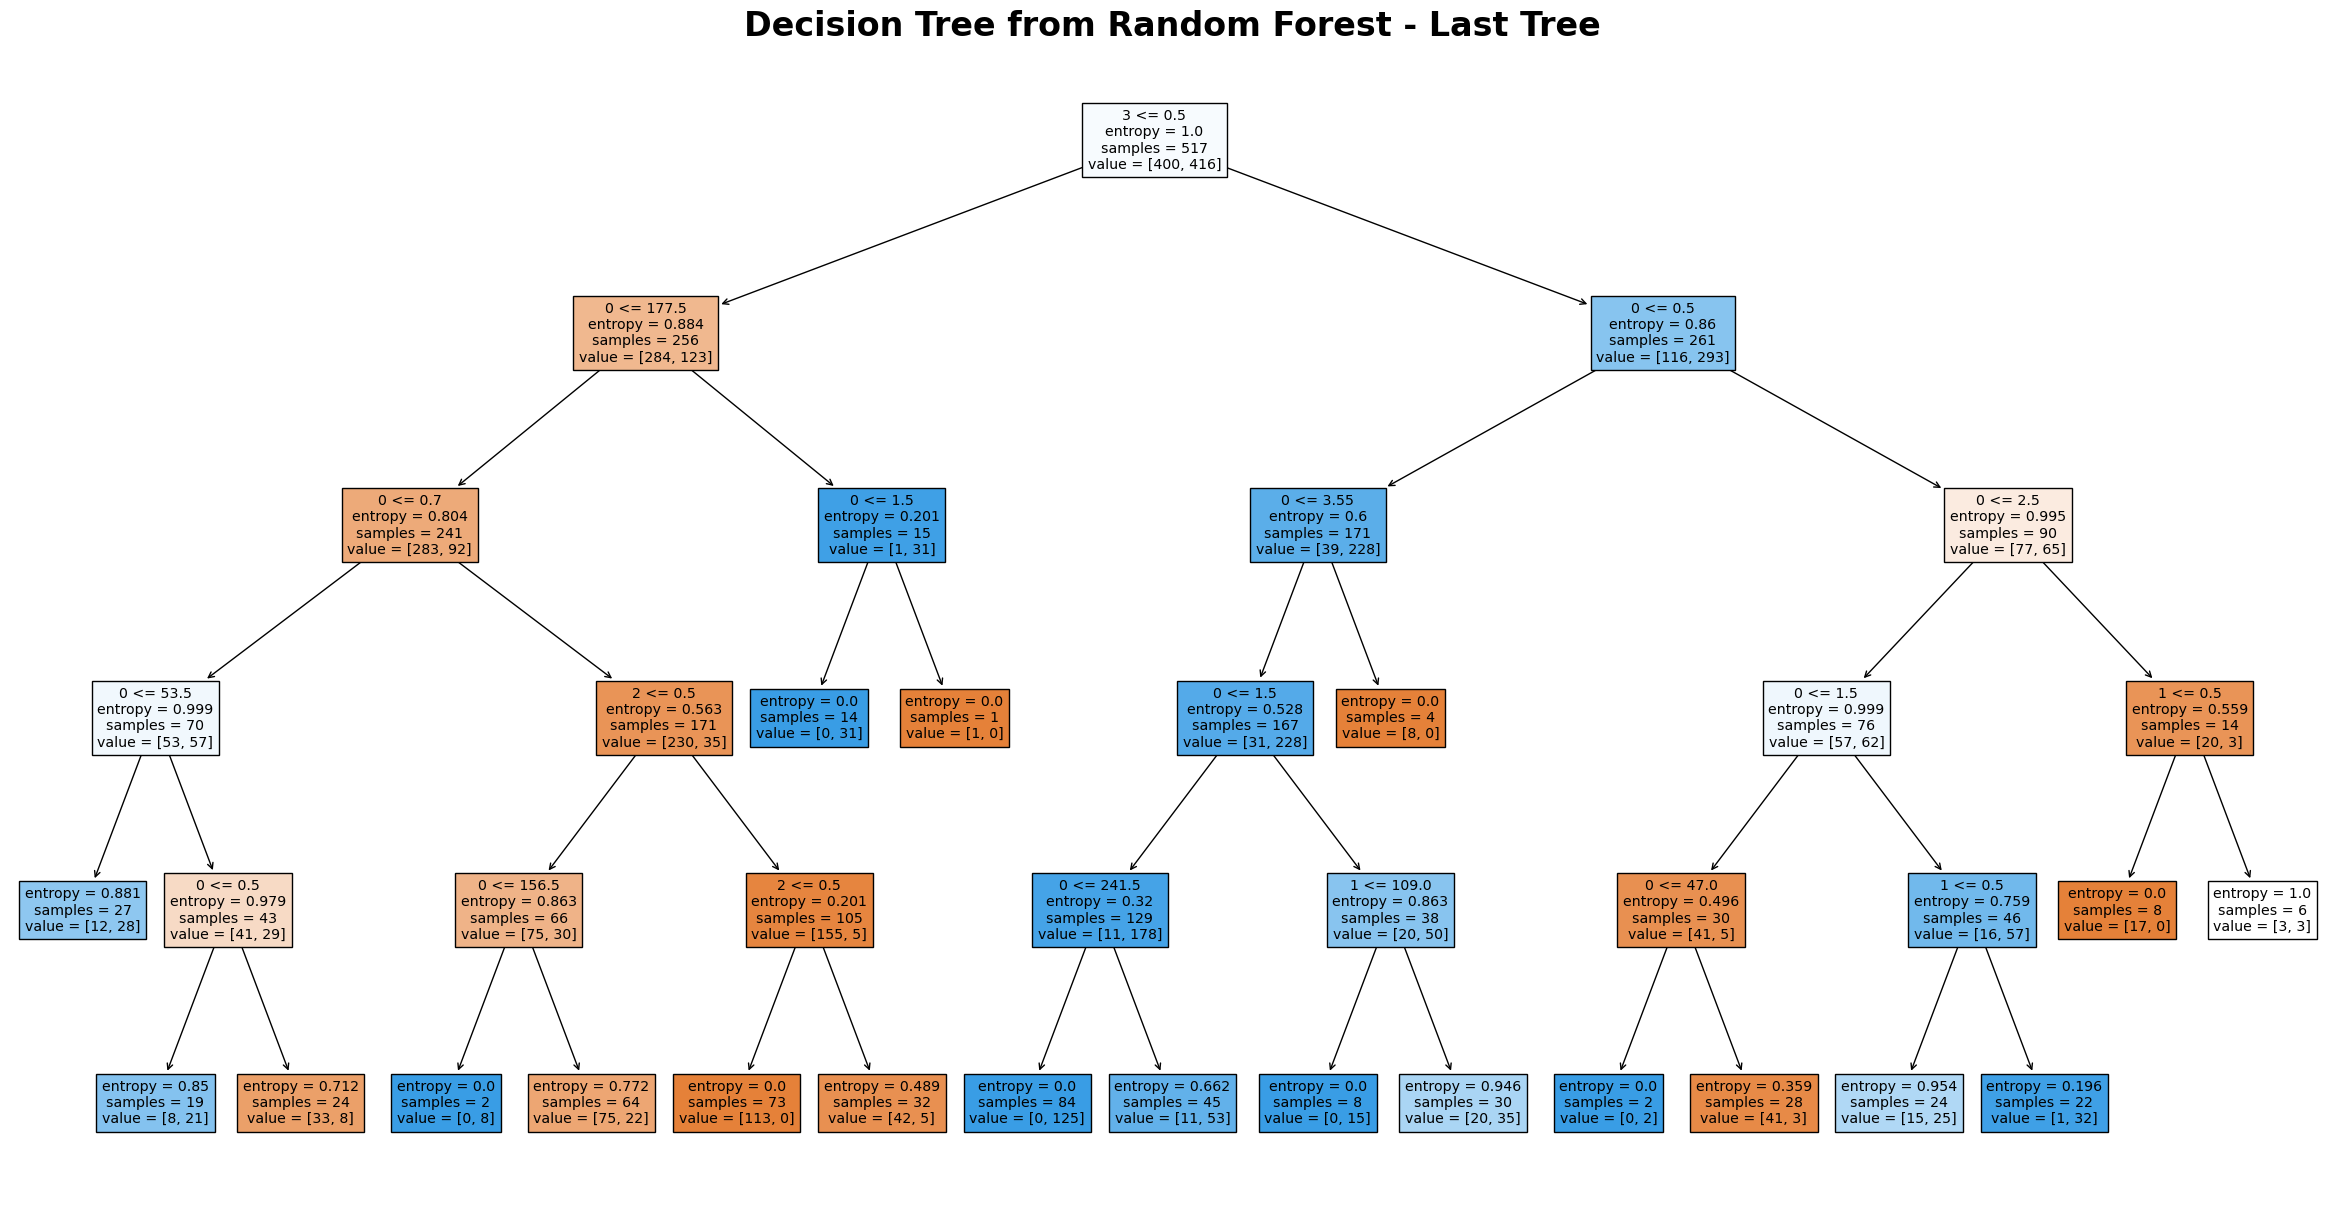

In [ ]:
# Import library yang diperlukan
from sklearn import tree
import matplotlib.pyplot as plt

# Akses estimator (pohon keputusan) terakhir dalam Random Forest
estimator = RandFor_new.estimators_[-1]

# Plot pohon keputusan menggunakan Matplotlib
plt.figure(figsize=(30,15))
tree.plot_tree(estimator, filled=True, feature_names=X_resampled['ca'])
plt.title('Decision Tree from Random Forest - Last Tree', fontsize=24, fontweight='bold')
plt.show()

 ***Notes:*** Ingat bahwa Random Forest terdiri dari banyak pohon keputusan dan pohon terakhir yang digunakan untuk estimasi mungkin bervariasi tergantung pada konfigurasi dan proses pelatihan model.